# SCS2013 Exercise 15

**This exercise notebook will go through some Machine Learning examples with Python libraries:**

- Scikit-Learn
- TensorFlow or PyTorch

## Classification: Fashion MNIST

이 [튜토리얼](https://www.tensorflow.org/tutorials/keras/classification?hl=ko)에서는 운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련합니다. 상세 내용을 모두 이해하지 못해도 괜찮습니다. 여기서는 완전한 텐서플로(TensorFlow) 프로그램을 빠르게 살펴 보겠습니다. 여기에서는 텐서플로 모델을 만들고 훈련할 수 있는 고수준 API인 [tf.keras](https://www.tensorflow.org/guide/keras)를 사용합니다.

A [tutorial](https://www.tensorflow.org/tutorials/keras/classification) in English is also provided

In [ ]:
# import TensorFlow and Keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# check tf version
print(tf.__version__)

2.12.0


### Import dataset

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋을 사용하겠습니다. 이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냅니다:

<table>
  <tr><td>     <img src="https://tensorflow.org/images/fashion-mnist-sprite.png" alt="Fashion MNIST sprite" width="600">   </td></tr>
  <tr><td align="center">     <b>그림 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br>{nbsp}   </td></tr>
</table>

패션 MNIST는 컴퓨터 비전 분야의 "Hello, World" 프로그램격인 고전 [MNIST](http://yann.lecun.com/exdb/mnist/) 데이터셋을 대신해서 자주 사용됩니다. 이 데이터셋은 비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 합니다. 코드를 테스트하고 디버깅하는 용도로 좋습니다.

여기에서 60,000개의 이미지를 사용하여 네트워크를 훈련하고 10,000개의 이미지를 사용하여 네트워크에서 이미지 분류를 학습한 정도를 평가합니다. TensorFlow에서 직접 [Fashion MNIST 데이터](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)를 가져오고 로드합니다.

load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환됩니다:

- `train_images`와 `train_labels` 배열은 모델 학습에 사용되는 *훈련 세트*입니다.
- `test_images`와 `test_labels` 배열은 모델 테스트에 사용되는 *테스트 세트*입니다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. *레이블*(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 *클래스*(class)를 나타냅니다:

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있습니다. 데이터셋에 *클래스 이름*이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장합니다:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Preprocess the data

모델을 훈련하기 전에 데이터셋 구조를 살펴봅니다. 다음 코드는 훈련 세트에 60,000개의 이미지가 있다는 것을 보여주며, 각 이미지는 28x28 픽셀로 표현됩니다. 훈련 세트에는 60,000개의 레이블이 있으며 각 레이블은 0과 9 사이의 정수입니다. 비슷하게 테스트 세트에는 10,000개의 이미지가 있습니다.



In [ ]:
# train dataset
print(type(train_images))
print(train_images.shape)
print(len(train_labels))

print(train_labels)

<class 'numpy.ndarray'>
(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


In [ ]:
# test dataset
print(test_images.shape)
print(len(test_labels))

print(test_labels)

(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


신경망 모델을 훈련하기 전에 데이터를 전처리해야 합니다. 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다.

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다. 이렇게 하려면 255로 나누어야 합니다. *훈련 세트*와 *테스트 세트*를 동일한 방식으로 전처리하는 것이 중요합니다.

*훈련 세트*에서 처음 10개 이미지와 그 아래 클래스 이름을 출력해 봅시다. 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마칩니다.

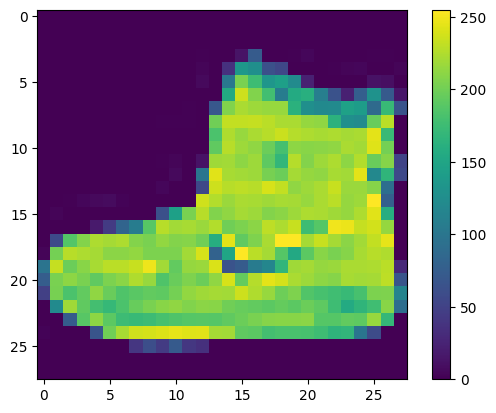

In [ ]:
# data visualization
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# normalizing
train_images = train_images / 255.0

test_images = test_images / 255.0

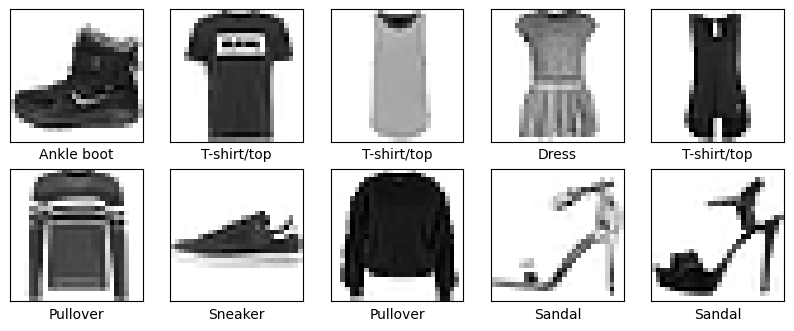

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build and Compile the model

신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.

* Layer (층)

  신경망의 기본 빌딩 블록은 [*레이어*](https://www.tensorflow.org/api_docs/python/tf/keras/layers) 입니다. 레이어는 레이어에 공급된 데이터로부터 표현을 추출합니다. 이러한 표현은 당면한 문제에 의미가 있어야 합니다.

  * 대부분 딥러닝은 간단한 층을 연결하여 구성됩니다. `tf.keras.layers.Dense`와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다.

  * 첫번째 층: 2차원 배열의 이미지를 $28 \times 280= 784$ 픽셀의 1차원 배열로 변환합니다. 
  * 그 이후에는 두 개의 `tf.keras.layers.Dense` 완전 연결(fully-connected) 층이 연속되어 연결됩니다. 
  * 마지막 층은 10개의 노드의 softmax 층으로, 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력합니다. 

* 모델 컴파일 

  - [*손실 함수*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.
  - [*옵티마이저*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.
  - [*메트릭*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) — 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 *정확도*를 사용합니다.

In [ ]:
# model build
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
# model compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Train the model 

신경망 모델을 훈련하려면 다음 단계가 필요합니다.

1. 훈련 데이터를 모델에 주입합니다-이 예에서는 `train_images`와 `train_labels` 배열입니다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
3. 테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 `test_images` 배열입니다. 이 예측이 `test_labels` 배열의 레이블과 맞는지 확인합니다.
4. 예측이 `test_labels` 배열의 레이블과 일치하는지 확인합니다.

* Feed the model: 훈련을 시작하려면 [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) 메서드를 호출합니다. 모델을 훈련 데이터에 "맞추는(fit)" 과정입니다. 
  * 모델이 훈련되면서 손실과 정확도 지표가 출력됩니다. 

* Evaluate accuracy: 모델이 테스트 데이터에 작동하는 방식을 비교합니다. 이 경우 테스트 정확도가 훈련 정확도보다 조금 낮은데 이는 '과대적합(Overfitting)' 때문입니다. 


In [ ]:
# fit the model with train dataset
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4998 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3729 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3319 - accuracy: 0.8792
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3104 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2909 - accuracy: 0.8941
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2770 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2651 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2547 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2448 - accuracy: 0.9097
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [ ]:
# Accuracy on test dataset
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3276 - accuracy: 0.8826 - 608ms/epoch - 2ms/step

Test accuracy: 0.8826000094413757


* Make predictions: 훈련된 모델을 사용해 새로운 이미지에 대한 예측을 수행할 수 있습니다. softmax 층을 연결하여 각 클래스의 "확률"로 변환합니다. 

  * 이 예측은 10개의 숫자 배열로 나타납니다. 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다. 가장 높은 신뢰도를 가진 레이블을 찾아봅니다: `argmax`
  * 이 예시에서는 모델은 이 이미지가 앵클 부츠(`class_name[9]`)라고 가장 확신하고 있습니다. 이 값이 맞는지 테스트 레이블을 확인해 봅니다.

In [ ]:
# make prediction probability model
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
probability_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 10)                101770    
                                                                 
 softmax_1 (Softmax)         (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# make predictions on test images
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# check a prediction of the first image
print(predictions[0])

# find the class with the highest confidence
print(np.argmax(predictions[0]))

# check the true label
print(test_labels[0])

[1.0721731e-08 1.2925472e-09 5.6749011e-10 8.7543471e-12 1.1318445e-08
 1.1562125e-03 7.5409717e-10 2.7301232e-03 7.2891533e-09 9.9611366e-01]
9
9


In [ ]:
# 예측 결과를 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

* Verify predictions: 예측 결과를 확인해봅니다. (이미지, 예측, 신뢰도 배열을 확인)

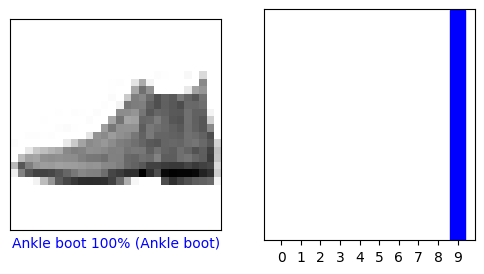

In [ ]:
# 0th image
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

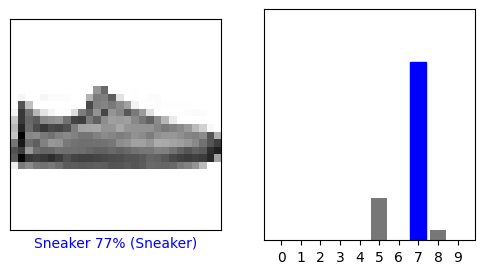

In [ ]:
# 12th image
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

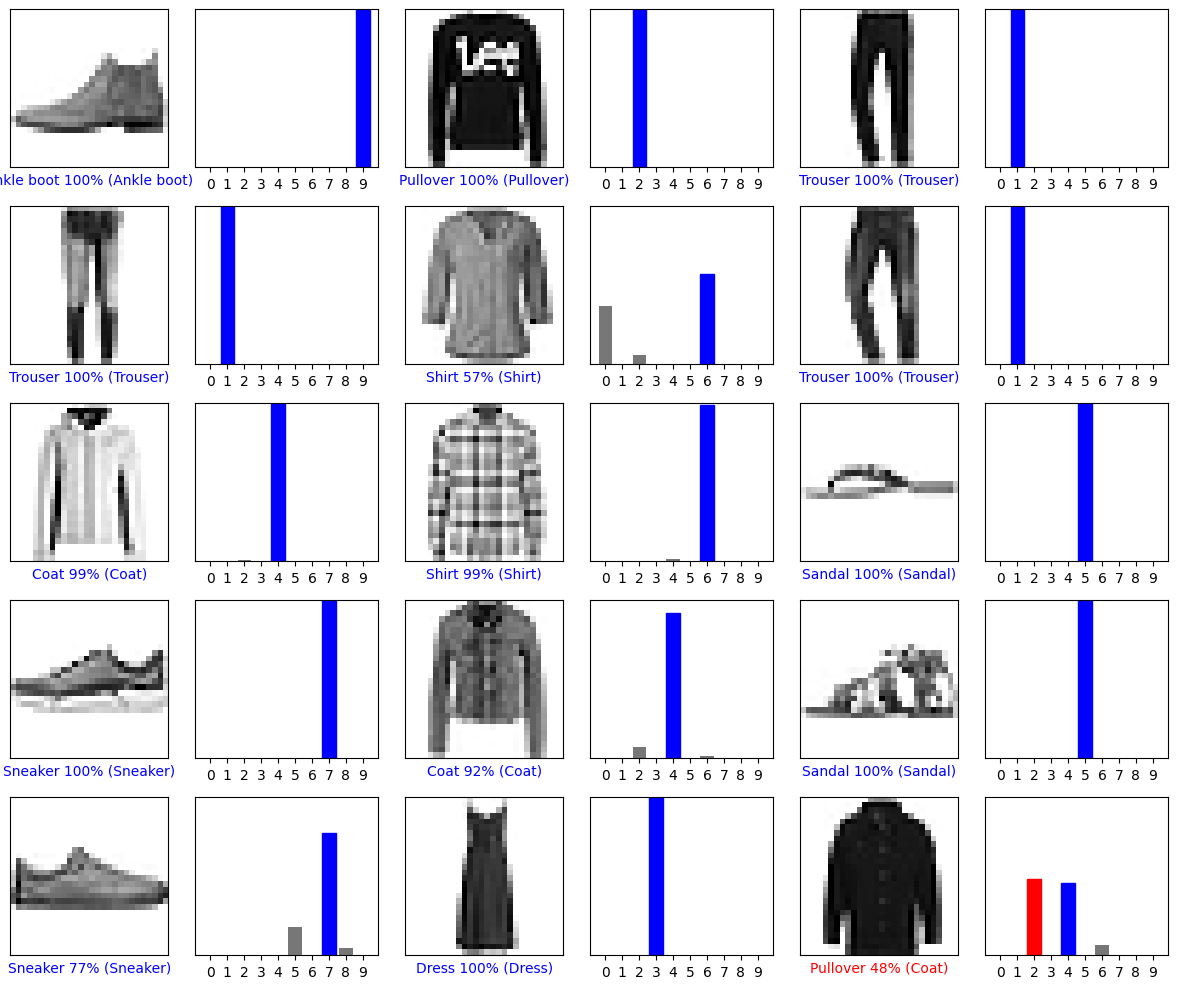

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Convolutional Neural Networks (CNN)

* Convolutional layers

  아래 6줄의 코드에서 [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)와 [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) 층을 쌓는 일반적인 패턴으로 합성곱 층을 정의합니다.

  입력으로 CNN은 배치 크기를 무시하고 형상(image_height, image_width, color_channels)의 텐서를 사용합니다. 이러한 차원을 처음 접하는 경우 color_channels는 (R,G,B)를 나타냅니다. 이 예에서는 CIFAR10 이미지 형식인 형상(32, 32, 3)의 입력을 처리하도록 CNN을 구성합니다. `input_shape` 인수를 첫 번째 레이어에 전달하여 이를 수행할 수 있습니다.

* 위에서 Conv2D와 MaxPooling2D 층의 출력은 (높이, 너비, 채널) 크기의 3D 텐서입니다. 모델을 완성하려면 마지막 합성곱 층의 출력 텐서(크기 (4, 4, 64))를 하나 이상의 Dense 층에 주입하여 분류를 수행합니다. Dense 층은 벡터(1D)를 입력으로 받는데 현재 출력은 3D 텐서입니다. 먼저 3D 출력을 1D로 펼치겠습니다. 그다음 하나 이상의 Dense 층을 그 위에 추가하겠습니다. CIFAR10 데이터는 10개의 클래스가 있으므로 마지막에 Dense 층에 10개의 출력과 소프트맥스 활성화 함수를 사용합니다.


In [3]:
import tensorflow as tf

from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


* Dataset: 편의성을 위해 일부 데이터만 사용합니다.

In [11]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [12]:
train_images = train_images[:20000, :,:,:]
train_labels = train_labels[:20000, :]
test_images = test_images[:5000, :,:,:]
test_labels = test_labels[:5000, :]

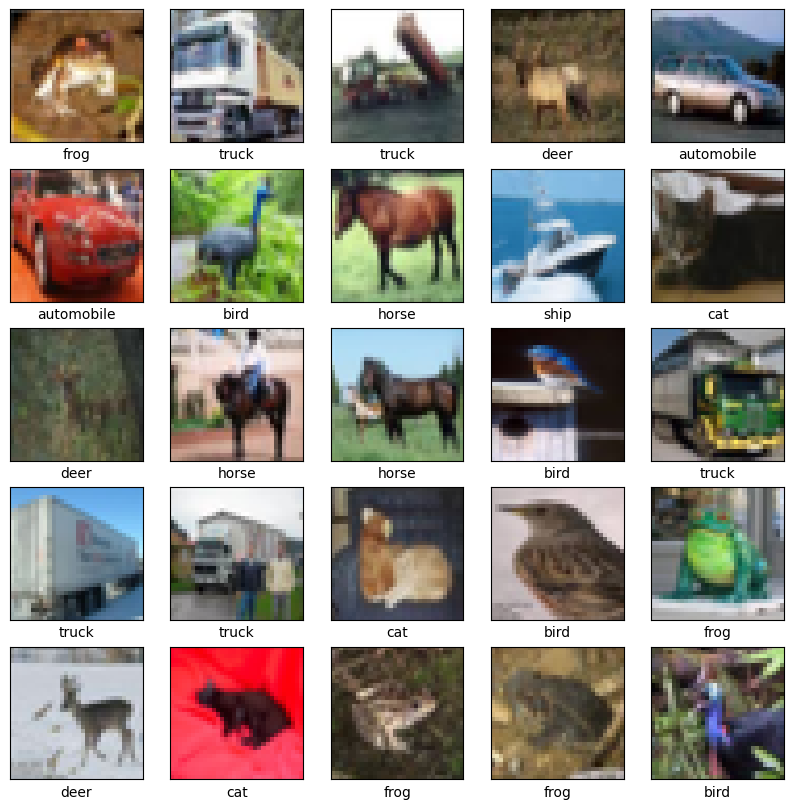

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
# CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

* Train the model: 모델을 학습합니다.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
625/625 [==============================] - 38s 58ms/step - loss: 0.7156 - accuracy: 0.7527 - val_loss: 0.8936 - val_accuracy: 0.6854
Epoch 2/10
625/625 [==============================] - 36s 57ms/step - loss: 0.6358 - accuracy: 0.7775 - val_loss: 0.9333 - val_accuracy: 0.6940
Epoch 3/10
625/625 [==============================] - 36s 58ms/step - loss: 0.5762 - accuracy: 0.7991 - val_loss: 0.9117 - val_accuracy: 0.7005
Epoch 4/10
625/625 [==============================] - 33s 53ms/step - loss: 0.5215 - accuracy: 0.8171 - val_loss: 0.9263 - val_accuracy: 0.7023
Epoch 5/10
625/625 [==============================] - 36s 57ms/step - loss: 0.4713 - accuracy: 0.8343 - val_loss: 0.9606 - val_accuracy: 0.7063
Epoch 6/10
625/625 [==============================] - 34s 54ms/step - loss: 0.4181 - accuracy: 0.8547 - val_loss: 1.0603 - val_accuracy: 0.6764
Epoch 7/10
625/625 [==============================] - 33s 53ms/step - loss: 0.3715 - accuracy: 0.8686 - val_loss: 1.1502 - val_accuracy:

157/157 - 2s - loss: 1.2994 - accuracy: 0.6756 - 2s/epoch - 12ms/step
0.675599992275238


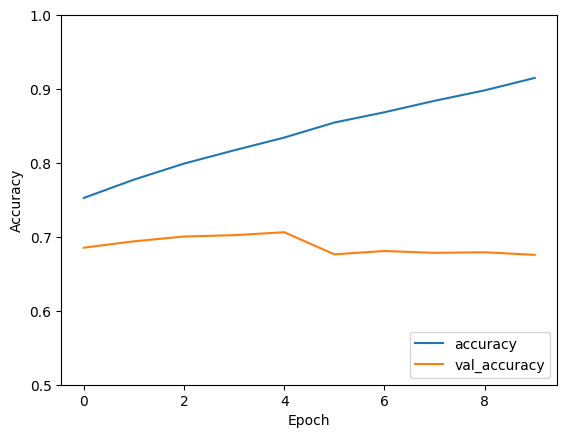

In [14]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

이 간단한 CNN은 훈련 데이터에 대해 91%의 정확도를 달성하였고, 67% 가량의 테스트 정확도를 달성했습니다.